

# Baseball Case Study


Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the data
df=pd.read_csv("baseball.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

In [5]:
#lets check for the null values in the dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

We can observe that there are no null values in the data set.

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Here we can observe that all the data types are integers.

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Analyzing the output(Target variable) :Number of predicted wins (W)

<AxesSubplot:xlabel='W', ylabel='Density'>

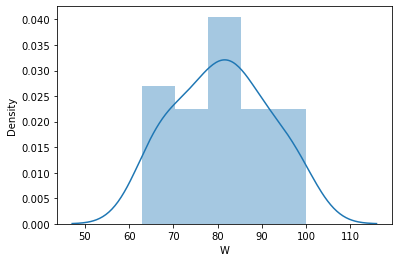

In [8]:
sns.distplot(df["W"])

Here we can observe that the distribution of the Target variable is Normal. Lets verify by checking the skewness.

In [9]:
df["W"].skew()

0.047088688953686085

# EDA


Now lets view the distribution of all the other variables.

In [10]:
sns.set_style("white")
plt.rcParams["font.size"]=15
plt.rcParams["figure.figsize"]=(10,7)
plt.rcParams["figure.facecolor"]="#FFE5B4"

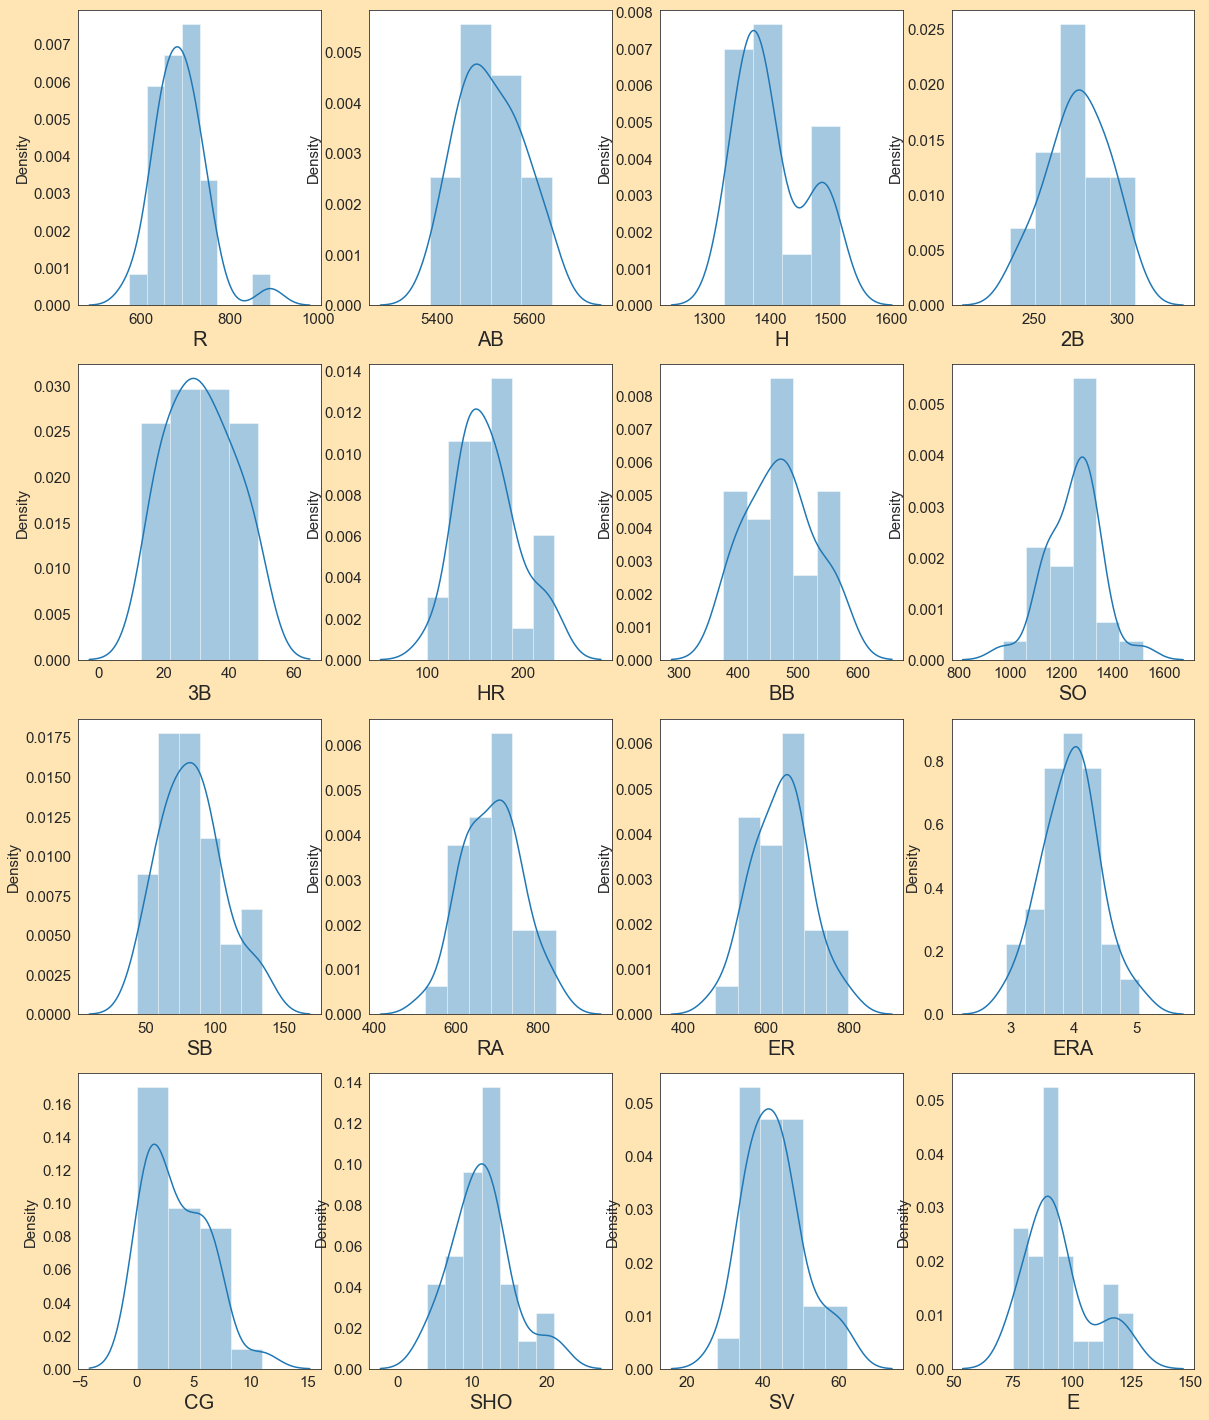

In [11]:
plt.figure(figsize=(20,25))
plotnum=1
for column in df.drop(columns=['W']):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnum+=1
plt.show()

In [12]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

From the above distribution graph we can observe that variable R, CG, E, SV,H are skewed , other than that the data is normal.

# Bivariate Analysis

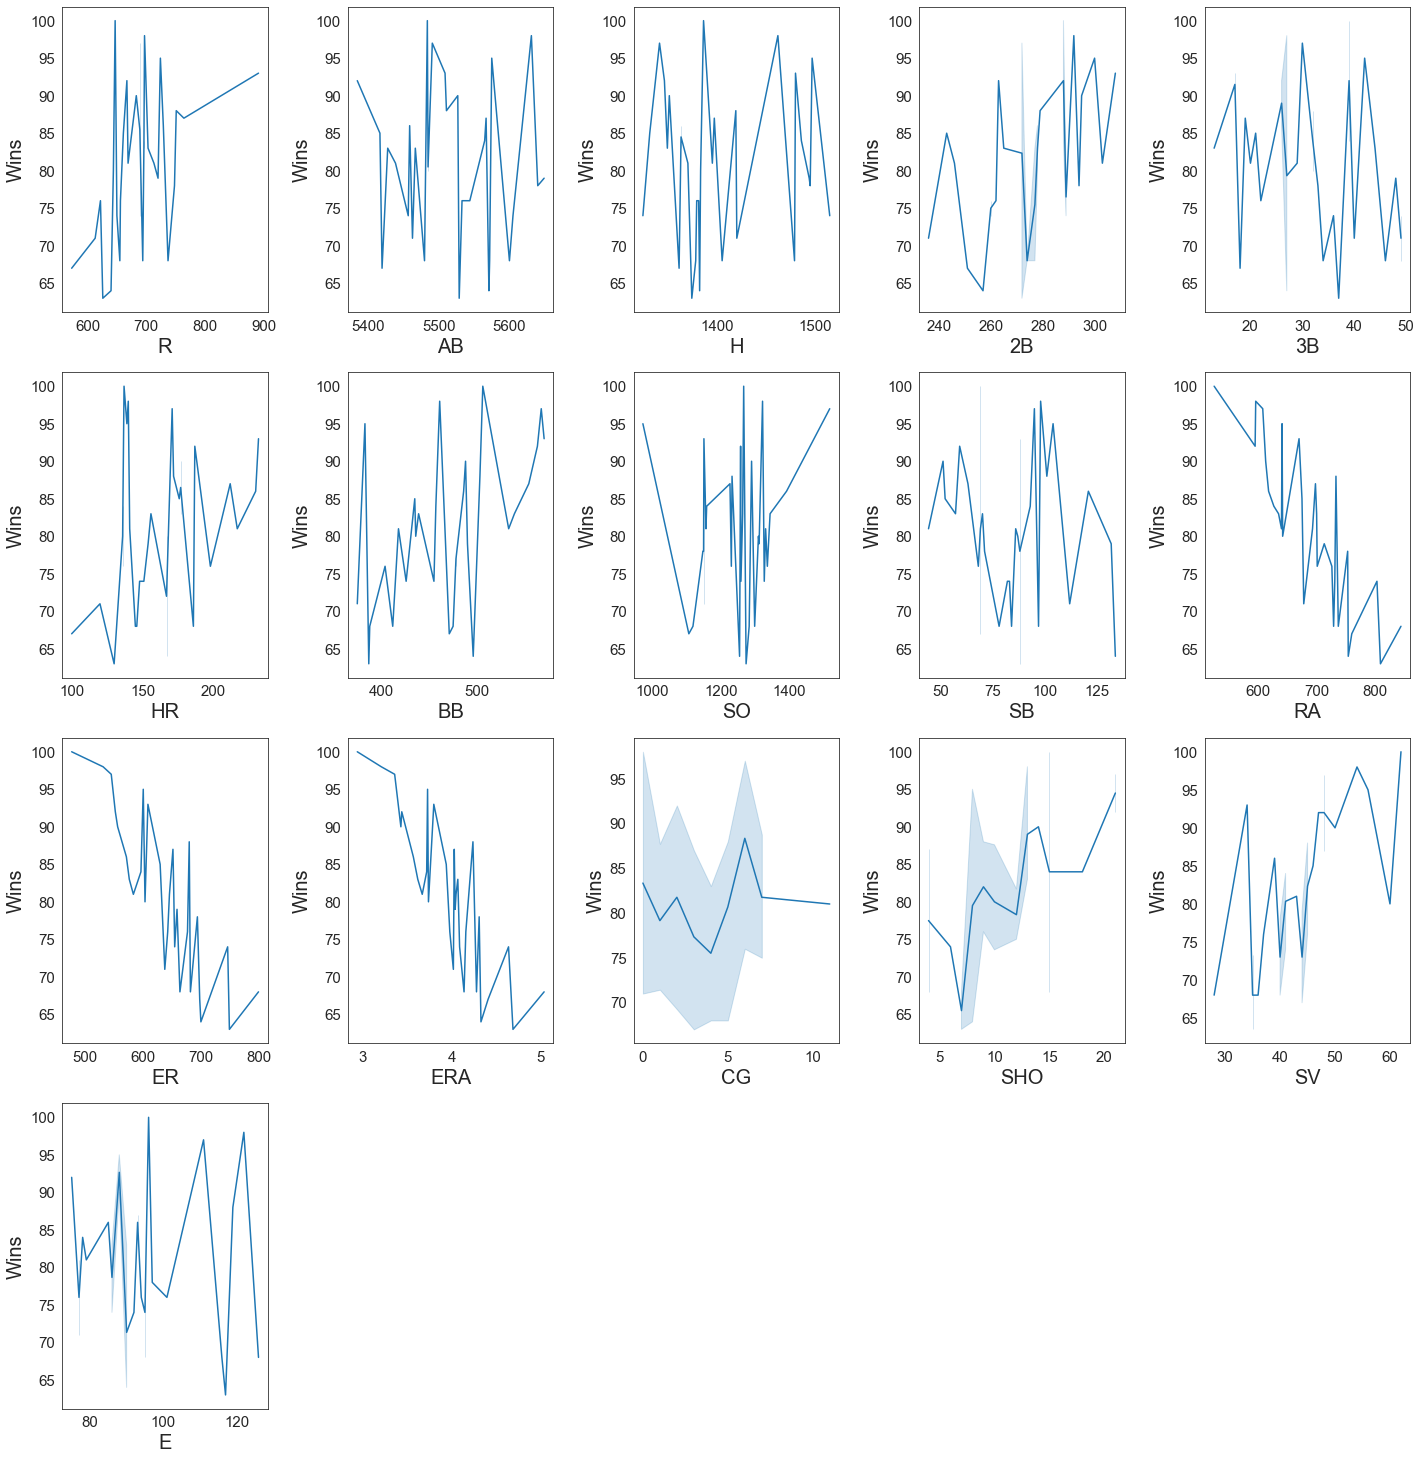

In [13]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X  = df.drop(columns=['W'])
y = df['W']
for column in X:
    if plotnum<=16:
        plt.subplot(5,5,plotnum)
        sns.lineplot(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Wins',fontsize=20)
    plotnum+=1
plt.tight_layout()

From the above graphs it can be observed that Features like R,2B,HR,BB,SV,SHO have a positive linear relationship with Win. While RA,ER,ERA have a negative linear relationship with W.

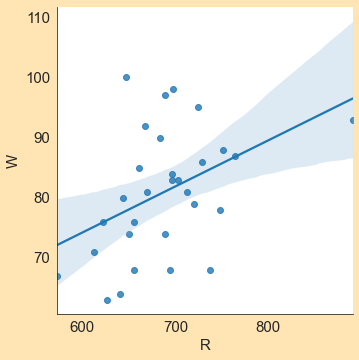

In [14]:
sns.lmplot(x="R", y="W", data=df)

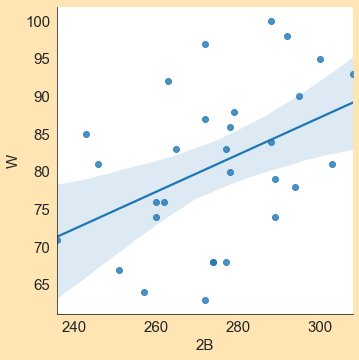

In [15]:
sns.lmplot(x="2B", y="W", data=df)

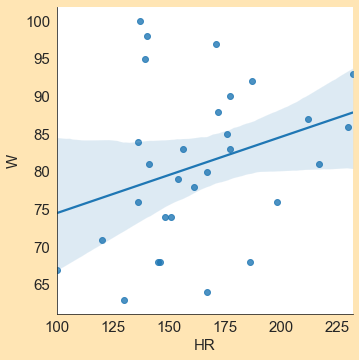

In [16]:
sns.lmplot(x="HR", y="W", data=df)


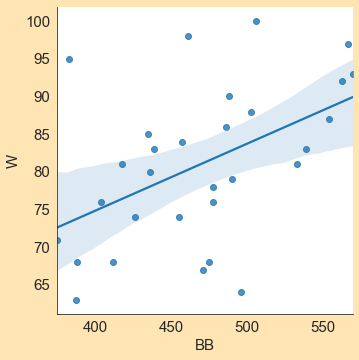

In [17]:
sns.lmplot(x="BB", y="W", data=df)


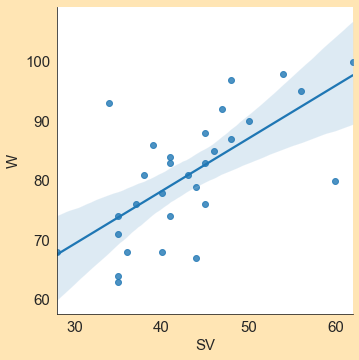

In [18]:
sns.lmplot(x="SV", y="W", data=df)


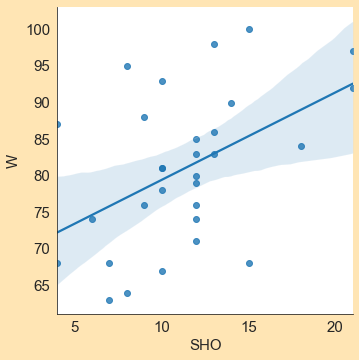

In [19]:
sns.lmplot(x="SHO", y="W", data=df)


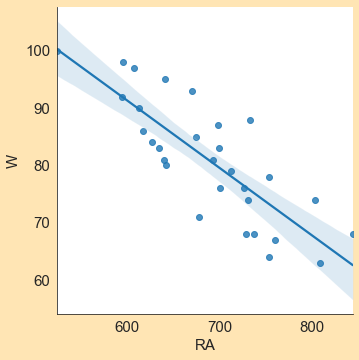

In [20]:
sns.lmplot(x="RA", y="W", data=df)


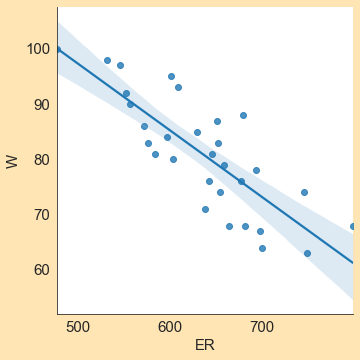

In [21]:
sns.lmplot(x="ER", y="W", data=df)


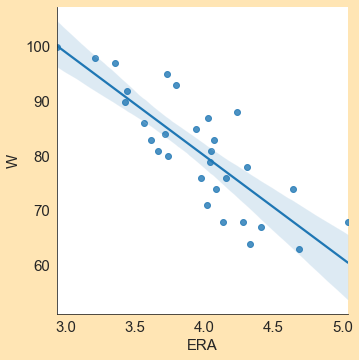

In [22]:
sns.lmplot(x="ERA", y="W", data=df)


Now we will check for the outliers in the data.

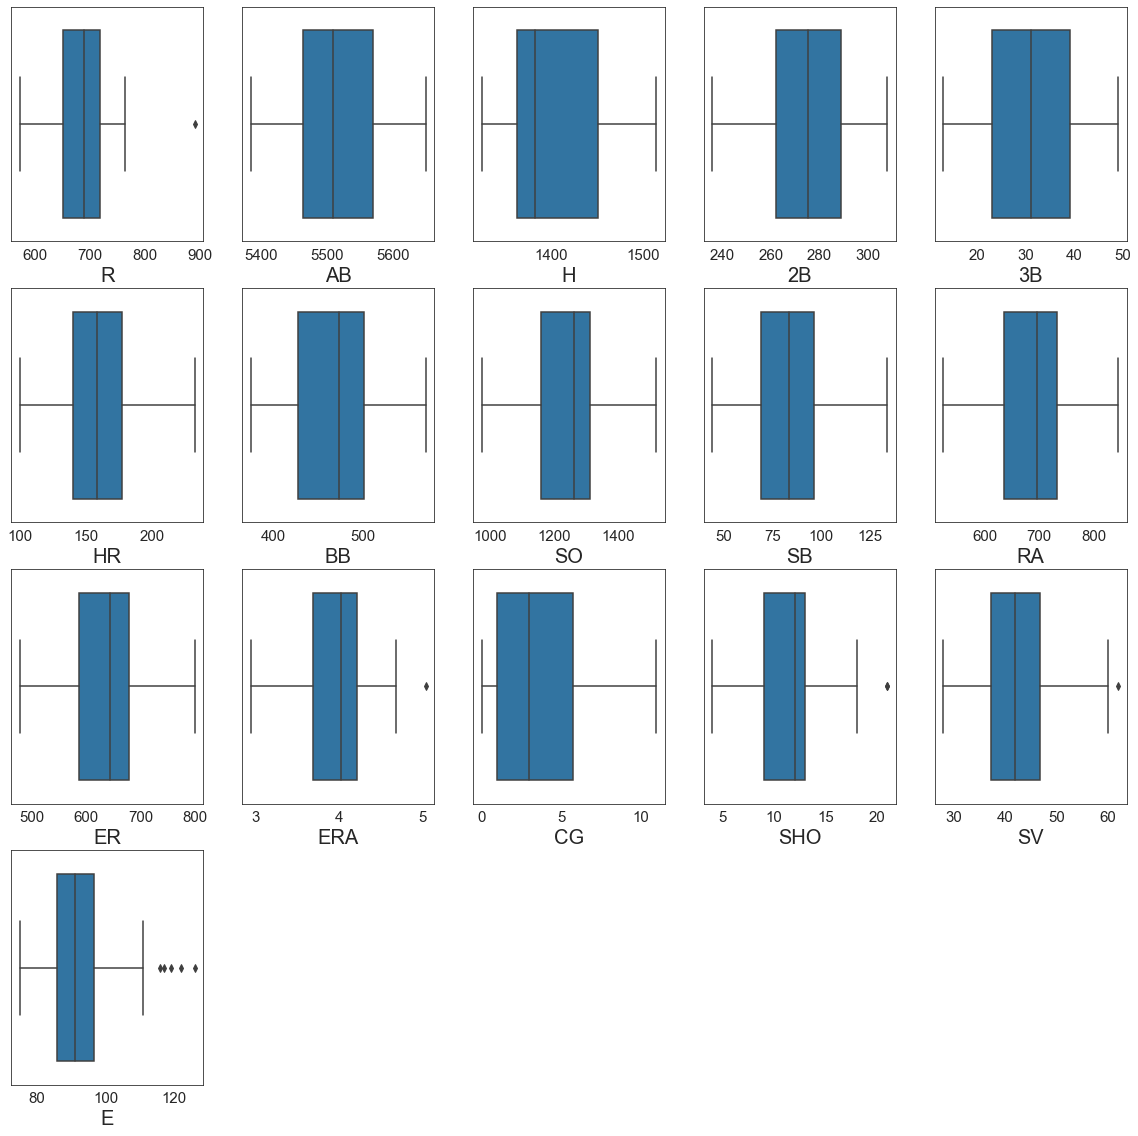

In [23]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns = ['W'],axis=1):
    if plotnum<=16:
        plt.subplot(5,5,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In the above box plots we can observe that there are outliers present in columns "R","ERA","SHO","SV","E"

# Treating Outliers

We will remove outliers using IQR method

In [24]:
df1=df.drop(columns = ['W',],axis=1).copy() #making a copy of all feature columns.


In [25]:
df1.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [26]:
indxdrop = np.array([])
for col in df:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    uppervalue = q3 + (1.5*iqr)
    lowervalue = q1 - (1.5*iqr)
    column = df[col]
    indx = column[(column > uppervalue) | (column < lowervalue)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [27]:
indxdrop 

array([ 5., 29., 17., 25., 15., 10., 14., 16., 18., 24.])

In [28]:
df1 = df1.drop(indxdrop)


In [29]:
df1.shape

(20, 16)

In [30]:
df.shape

(30, 17)

We will remove outliers using zscore method

In [31]:
df2 =df.drop(columns = ['W'],axis=1).copy() #we will make a copy of all Feature columns.


In [32]:
from scipy.stats import zscore
zs = zscore(df2)
z_score_abs = np.abs(zs)

df3 = df2[(z_score_abs < 3).all(axis=1)] 

In [33]:
df2.shape

(30, 16)

In [34]:
df3.shape

(29, 16)

We can observe the difference in the data loss using IQR method and z-score method.
Data loss is greater using IQR method comparing to z Score method, therefore we will use Z-score method to rem,ove outliers.

In [35]:
dropindx =df.index.difference(df3.index)


In [36]:
df.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [37]:
df.reset_index(drop=True,inplace = True) #resetting the index of the dataframe


In [38]:
df.shape

(29, 17)

In [39]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


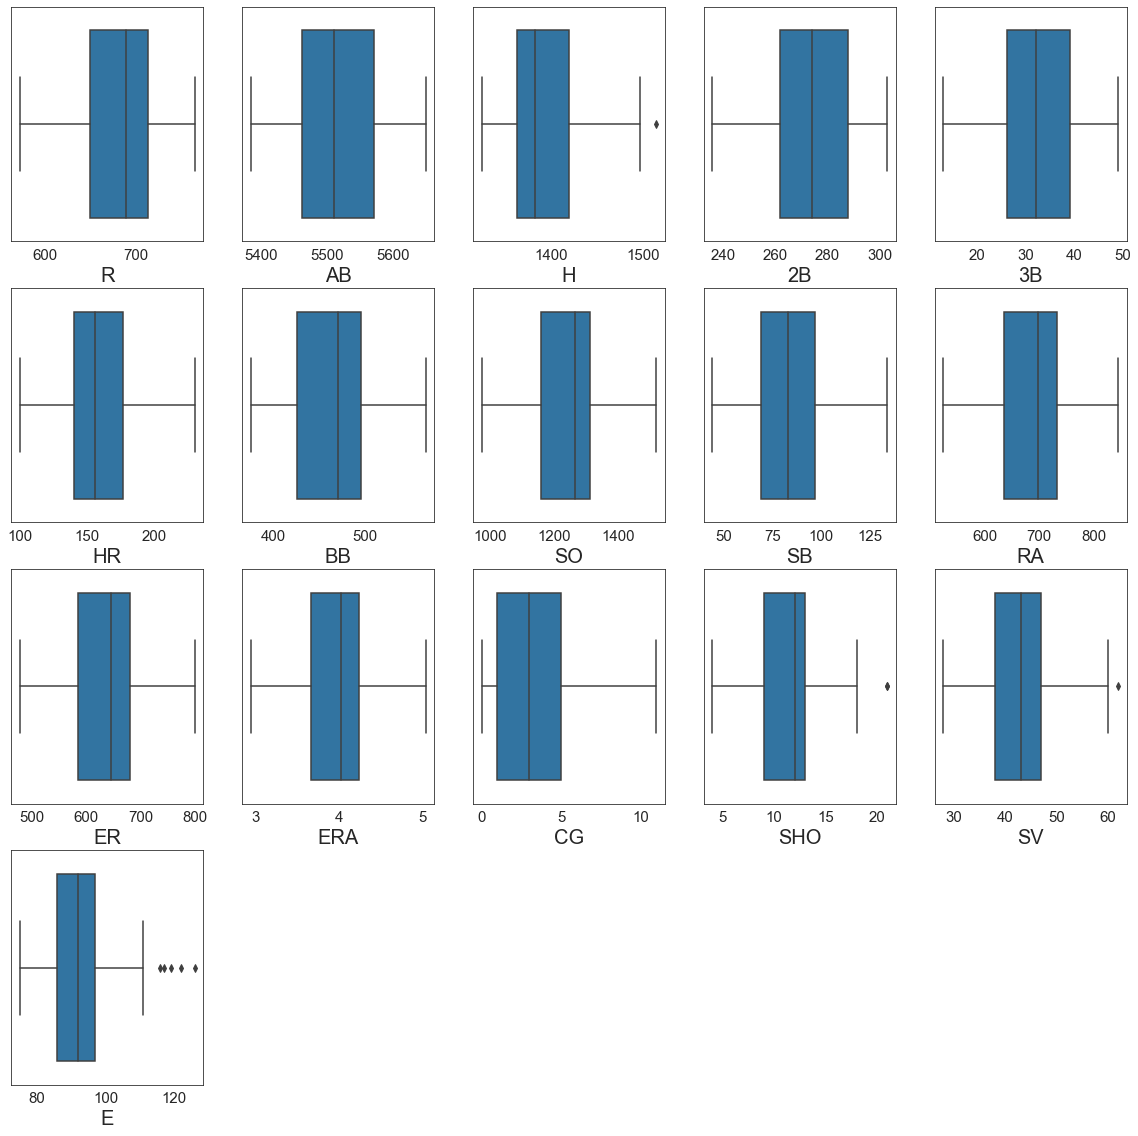

In [40]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns = ['W'],axis=1):
    if plotnum<=16:
        plt.subplot(5,5,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some of the outliers have been removed.
Now lets check skewness in our data.

In [41]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

We can observe that there is skewness in H,CG,SV,E. Other data looks normal.

# CORRELATION

In [42]:
corr=df.corr()

In [43]:
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


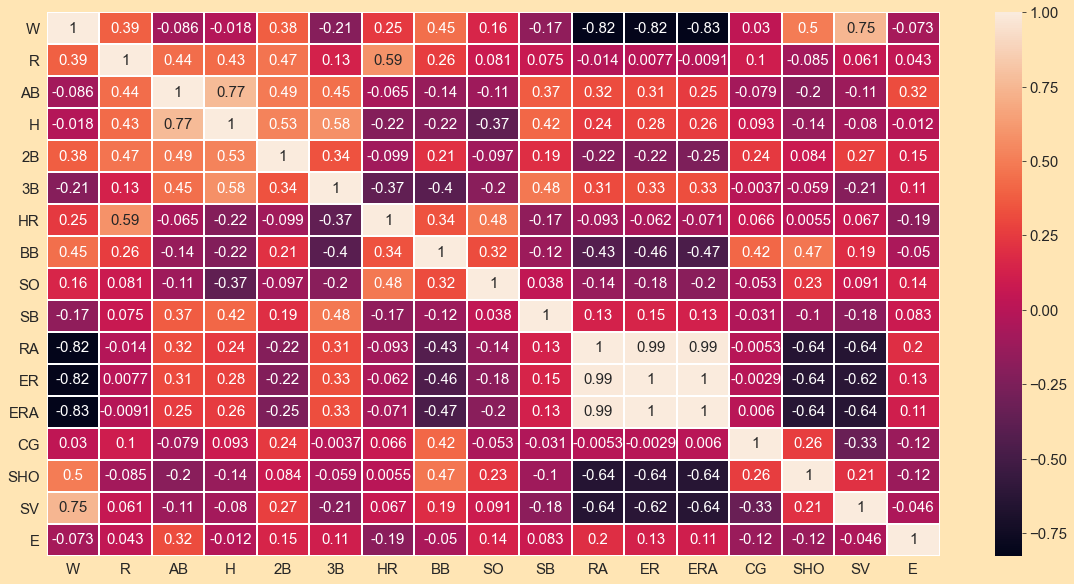

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

We can obsserve that RA,ERA,ER have a strong postitve relation with each other.

# Visualizing correlation of feature columns with label column.


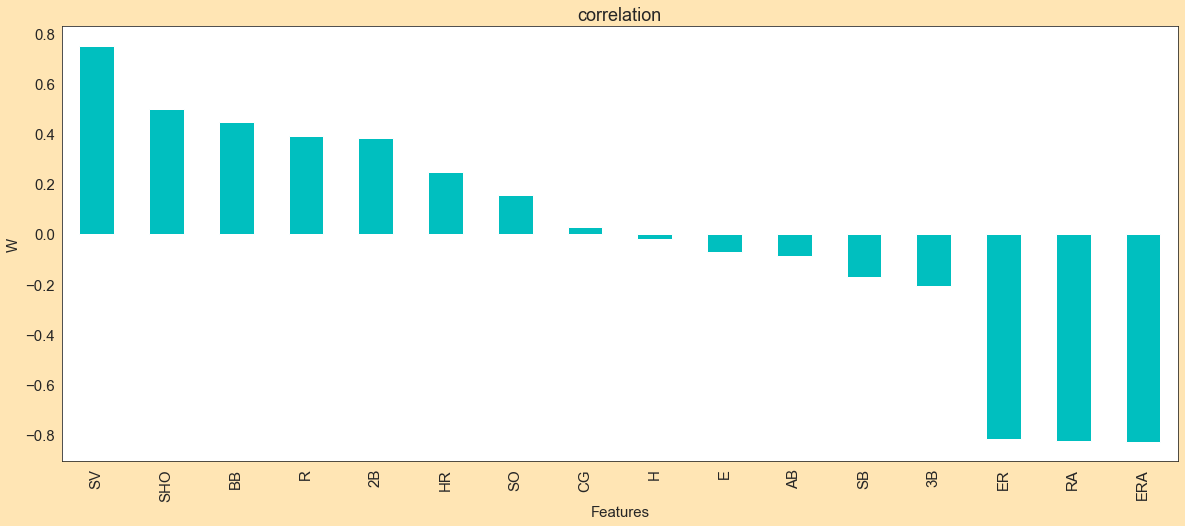

In [45]:
plt.figure(figsize = (20,8))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('W',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

We can observe that SV,SHO,BB has a strong positive correlation with W, while ER,ERA,RA have negatively strong relation with W.

# Normalizing Data Distribution using PowerTransformer


In [46]:
from sklearn.preprocessing import PowerTransformer

In [47]:
pwtrans=PowerTransformer(method='yeo-johnson', standardize=True)

In [48]:
skew= ['E','CG','SV']


In [49]:
df4=df[skew].copy()


In [50]:
df4

,E,CG,SV
0,88,2,56
1,86,2,45
2,79,11,38
3,101,7,37
4,86,7,35
5,93,3,48
6,77,0,43
7,95,1,60
8,97,3,40
9,119,5,45


In [51]:
(df==0).sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

In [52]:
transformed= pwtrans.fit_transform(df4)

In [53]:
type(transformed)

numpy.ndarray

In [54]:
transformed = pd.DataFrame(transformed, columns=df4.columns)

In [55]:
transformed.skew()

E     0.065585
CG   -0.045947
SV   -0.000925
dtype: float64

In [56]:
(transformed==0).sum()

E     0
CG    0
SV    0
dtype: int64

In [57]:
transformed.index=df.index

In [58]:
df[skew] = transformed[skew]

In [59]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.526943
SV    -0.000925
E      0.065585
dtype: float64

In [60]:
df.shape

(29, 17)

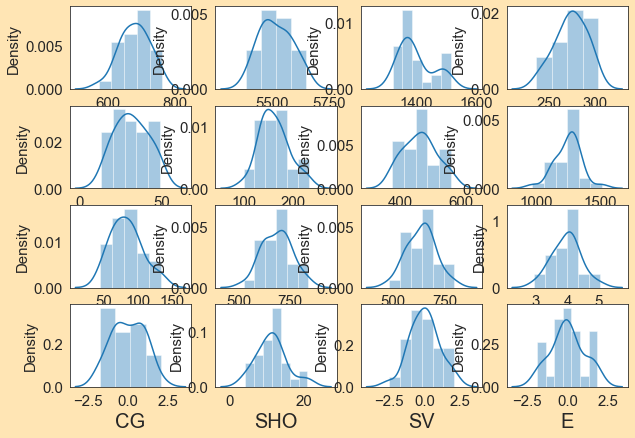

In [61]:
# plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns=['W']):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

The data is normalised now.

# Feature Selection

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
X=df.drop(columns=["W"])

In [64]:
y=df["W"]

In [65]:
scaler=StandardScaler()

In [66]:
scaled_X=scaler.fit_transform(X)

# Checking for Multicollinearity using Variance Inflation Factor

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
 vif=pd.DataFrame()

In [69]:
vif["Features"] = X.columns
vif['vif']=[variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [70]:
vif

,Features,vif
0,R,7.145507
1,AB,20.045249
2,H,10.070847
3,2B,3.617255
4,3B,3.351744
5,HR,8.763664
6,BB,3.478298
7,SO,2.896642
8,SB,1.985509
9,RA,202.458023


R,ER and ERA have the highest multicollinearity amongst all the features.

# Principle Component Analysis


In [71]:
from sklearn.decomposition import PCA

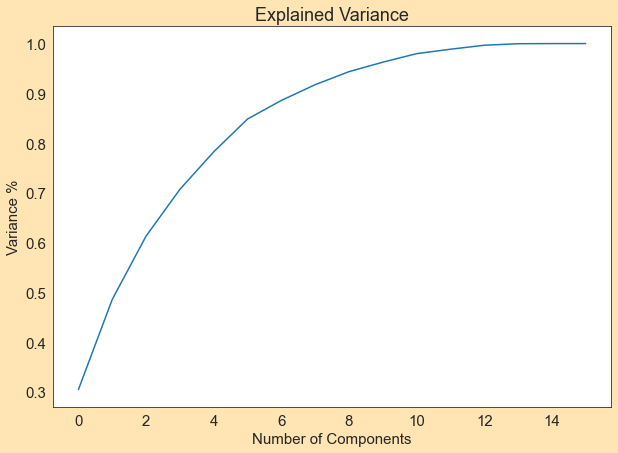

In [72]:
pca=PCA()
principleComponents=pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

In [73]:
pca = PCA(n_components=14)
new_comp = pca.fit_transform(scaled_X)
principle_x=pd.DataFrame(new_comp,columns=np.arange(14))

In [74]:
principle_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.083823,-2.920609,2.404411,-0.519192,-2.321222,-0.363228,0.801997,0.567603,0.669809,0.553509,0.609912,-0.237115,-0.142374,0.156116
1,0.040239,0.441891,0.307842,-0.028394,-0.301015,0.383767,-0.928506,1.403832,0.094520,0.118770,-0.717897,-0.277762,-0.047386,0.531173
2,-1.193819,-0.797624,0.127786,2.706134,-0.639873,-0.688634,1.477931,1.007298,0.076831,-1.211474,-0.329547,0.128500,0.054950,-0.122480
3,0.726536,1.464451,0.666725,0.743334,0.526002,-1.123210,-0.122907,-0.254285,0.381915,-0.586572,1.390158,0.143165,0.797181,0.268029
4,3.433005,-1.466989,-0.694311,1.676540,0.015659,0.233655,-1.137787,0.194456,-1.156522,-0.276122,0.114767,0.158575,0.118948,-0.316581
5,-0.349433,-0.354773,-2.819142,-1.204914,-1.684508,-1.049062,1.001475,-0.499151,-0.024055,0.251810,-0.613946,-0.077660,0.797618,0.026140
6,-0.833840,2.203214,-1.321381,-1.685617,-2.094846,1.419340,-1.255718,-0.646639,0.052447,-0.429191,-0.056212,0.177004,-0.033744,0.024824
7,-1.335585,0.054447,1.078886,-1.477306,0.182585,0.214306,0.025752,0.822445,-0.721766,0.362064,0.550002,-0.415113,-0.188529,-0.271990
8,2.157745,-2.052948,-0.914972,-0.012153,-1.098287,-1.181274,-0.470617,-0.839563,-0.209176,-0.080908,-0.329612,0.101535,-0.311042,0.017298
9,1.015355,-0.945705,-1.545605,-0.332017,0.422738,-0.917129,0.871394,0.495582,0.447687,1.213895,-0.137579,0.448252,-0.367028,0.076357


In [75]:
from sklearn.feature_selection import SelectKBest, f_classif


In [76]:
bestfit = SelectKBest(score_func = f_classif, k = 16)
fit = bestfit.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [77]:
fit = bestfit.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(22,'Score'))

   Feature     Score
15       E  4.329879
8       SB  3.283197
9       RA  2.524616
0        R  2.485509
14      SV  1.764635
11     ERA  1.732208
10      ER  1.636442
1       AB  1.622586
7       SO  1.519889
13     SHO  1.253358
6       BB  0.943327
5       HR  0.818974
4       3B  0.811129
3       2B  0.799063
2        H  0.729450
12      CG  0.436693


Selecting best features based on their scores and dropping a highly colinear column 'ERA'.

In [78]:
x_best = X.drop(columns = ['ERA','CG']).copy() #dropping highly colinear feature and feature with lowest score

In [79]:
ss_x_best = scaler.fit_transform(x_best)

We have to predict the number of wins, which is continuous in nature, hence we will use regression models.

#  Model Building

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
from sklearn.metrics import r2_score

Finding the Best Random State

In [82]:
from sklearn.linear_model import Lasso
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(ss_x_best,y,test_size = .23,random_state = i)
    modr =  Lasso()
    modr.fit(x_train,y_train)
    pred = modr.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"At random_state: {maxRS} , Best Accuracy is: {maxAcc}")

At random_state: 82 , Best Accuracy is: 0.9535335084587393


In [83]:
x_train,x_test,y_train,y_test = train_test_split(ss_x_best,y,test_size = .23, random_state =82)


In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [85]:
from sklearn.metrics import r2_score,mean_squared_error

In [86]:
rf = RandomForestRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()
l = Lasso()
adb = AdaBoostRegressor()

# Model Training 

In [87]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
r.fit(x_train,y_train)
l.fit(x_train,y_train)
adb.fit(x_train,y_train)

AdaBoostRegressor()

# Ridge Regression Model


In [88]:
y_r_pred = r.predict(x_test)

# R2 Score

In [89]:
r2_score(y_test,y_r_pred)

0.740080340619877

# Mean Squared Error

In [90]:
mean_squared_error(y_test,y_r_pred)

17.92915201438399

# Root Mean Squared Error

In [91]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

4.234282939812123

# Lasso Regression Model

In [92]:
y_l_pred = l.predict(x_test)

# R2 Score

In [93]:
r2_score(y_test,y_l_pred)

0.9535335084587393

# Mean Squared Error

In [94]:
mean_squared_error(y_test,y_l_pred)

3.2052396206012497

# Root Mean Squared Error


In [95]:
np.sqrt(mean_squared_error(y_test,y_l_pred))


1.7903183014763742

# Random Forest Regression Model


In [96]:
y_rf_pred = rf.predict(x_test)

# R2 Score

In [97]:
r2_score(y_test,y_rf_pred)

0.5939478106508873

# Mean Squared Error

In [98]:
mean_squared_error(y_test,y_rf_pred)

28.0093142857143

# Root Mean Squared Error

In [99]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

5.292382666220792

# XGB Regression Model

In [100]:
y_xg_pred = xg.predict(x_test)

# R2 Score

In [101]:
r2_score(y_test,y_xg_pred)

0.6933053935036724

# Mean Squared Error

In [102]:
mean_squared_error(y_test,y_xg_pred)

21.155668774644646

# Root Mean Squared Error

In [103]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

4.5995291905416416

# AdaBoost Regression Model

In [104]:
y_adb_pred = adb.predict(x_test)

# R2 Score

In [105]:
r2_score(y_test,y_adb_pred)

0.49299186390532546

# Mean Squared Error

In [106]:
mean_squared_error(y_test,y_adb_pred)

34.973214285714285

# Root Mean Squared Error

In [107]:
np.sqrt(mean_squared_error(y_test,y_adb_pred))

5.913815543768193

# Model Cross Validation

In [108]:
from sklearn.model_selection import ShuffleSplit,cross_val_score,KFold

# Ridge Regression

In [109]:
cross_val_score(r,ss_x_best,y, cv=4).mean()

0.553934442865905

# Lasso Regression

In [110]:
cross_val_score(l,ss_x_best,y,cv=4).mean()

0.7529016115079561

# Random Forest Regression

In [111]:
cross_val_score(rf,ss_x_best,y,cv=4).mean()


0.4859523002715035

# XGB Regression

In [112]:
cross_val_score(xg,ss_x_best,y,cv=4).mean()

0.3924562694370372

# AdaBoost Regression

In [113]:
cross_val_score(adb,ss_x_best,y,cv=4).mean()

0.5675793724329947

Based on comparing Accuracy Score results with Cross Validation results, it is determined that Lasso Regression is the best model. It also has the lowest Root Mean Squared Error score

Hyper Parameter Tuning


In [114]:
parameter = {'alpha':np.array([5,0.5,0.05,0.005,0.0005,1,0.1,0.01,0.001,0.0001,0]),'fit_intercept': [True,False],'normalize':[True,False],'max_iter':[1000,2000,3000],'random_state':np.arange(100),'selection':["cyclic","random"]}

In [115]:
GridCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [116]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 26400 candidates, totalling 132000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 0.e+00]),
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 3000],
                         'normalize': [True, False],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=1)

In [117]:
GridCV.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'random_state': 15,
 'selection': 'random'}

In [118]:
Best_mod = Lasso(alpha = 1, fit_intercept= True, normalize = False,max_iter = 1000, random_state = 15,selection ='random')

In [119]:
Best_mod.fit(x_train,y_train)

Lasso(alpha=1, random_state=15, selection='random')

In [120]:
lpred = Best_mod.predict(x_test)
acc = r2_score(y_test,lpred)
print(acc*100)

95.35279096387974


Lasso Regression has an accuracy of 95.35%

# Saving The Model


In [122]:
import joblib
joblib.dump(Best_mod,"BestModelBaseball.pkl")

['BestModelBaseball.pkl']

Loading The Model


In [123]:
mod=joblib.load("BestModelBaseball.pkl")

In [124]:
print(mod.predict(x_test))

[64.39376399 79.91093734 77.47769336 90.34134458 72.42438173 86.29169899
 85.29648827]


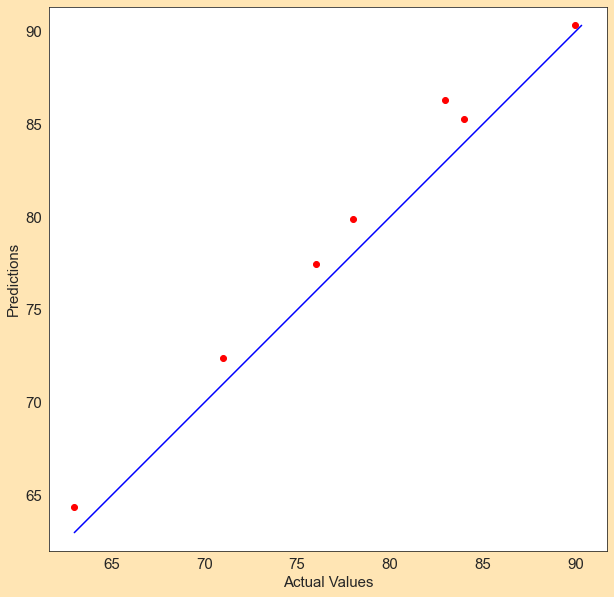

In [125]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, lpred, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(lpred), max(y_test))
p2 = min(min(lpred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()